In [323]:
import pandas as pd

df = pd.read_csv('fruit.csv')
y = df['class'].values
df = df.iloc[:,1:]
X = df.drop(columns = 'class').values




In [324]:
# perform train - test split. (40% as testing and 60% as training)
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split()

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                    test_size = 0.40, 
                                    random_state=1)
X_test.shape

(24, 4)

In [325]:
# perform train - test split. (40% as testing and 60% as training)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


#X_train, X_test, y_train, y_test = train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                    test_size = 0.40, 
                                    random_state=1)

### KNN MODEL

In [326]:
def my_KNN_classifier(X_train, y_train):
    #--------------------------------------------------
    ## ----------- K-NN Classifier ------------------## 
    #--------------------------------------------------
    

    steps = [('scaler', StandardScaler()),         
            ('knn', KNeighborsClassifier(n_neighbors = 3))]

    knn_pipeline = Pipeline(steps)
    knn_pipeline.fit(X_train, y_train)
    

    #--------------------------------------------------
    ## Model Evaluation ## 
    #--------------------------------------------------


    ypred_test = knn_pipeline.predict(X_test)
    report_clf = classification_report(y_test, ypred_test, output_dict= True)

    macro_avg_precision = report_clf['macro avg']['precision']
    macro_avg_recall = report_clf['macro avg']['recall']
    
    return macro_avg_precision, macro_avg_recall

### LR MODEL

In [327]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

def my_LR_classifier(X_train, y_train):
    #--------------------------------------------------
    ## ------------Logistic Regression----------------## 
    #--------------------------------------------------

    steps = [('scaler', StandardScaler()),         
             ('logReg', LogisticRegression(penalty="l2", C=1.0))]
     
    LR_pipeline = Pipeline(steps)
    LR_pipeline.fit(X_train, y_train)

    #--------------------------------------------------
    ## Model Evaluation ## 
    #--------------------------------------------------

    ypred_test = LR_pipeline.predict(X_test)
    report_clf = classification_report(y_test, ypred_test, output_dict=True)

    lr_precision = report_clf['macro avg']['precision']
    lr_recall = report_clf['macro avg']['recall']
    
    return lr_precision, lr_recall



### SVM MODEL

In [328]:
def my_SVC_classifier(X_train, y_train):
    from sklearn.svm import SVC

    ## Linear Kernel  ---------------
    steps = [('scaler', StandardScaler()),         
            ('svc', SVC(kernel = 'linear',
                        class_weight='balanced'))]

    svcL_pipeline = Pipeline(steps)
    svcL_pipeline.fit(X_train, y_train)
    ypred_test = svcL_pipeline.predict(X_test)
    report_clf = classification_report(y_test, ypred_test, output_dict= True)
    
    lr_precision = report_clf['macro avg']['precision']
    lr_recall = report_clf['macro avg']['recall']

    ## Polynomial Kernel -----------------------
    steps = [('scaler', StandardScaler()),         
            ('svc', SVC(kernel = 'poly', degree = 3, 
                        class_weight='balanced'))]

    svcPoly_pipeline = Pipeline(steps)
    svcPoly_pipeline.fit(X_train, y_train)
    ypred_test = svcPoly_pipeline.predict(X_test)
    report_clf = classification_report(y_test, ypred_test, output_dict= True)
    
    poly_precision = report_clf['macro avg']['precision']
    poly_recall = report_clf['macro avg']['recall']

    ## RBF Kernel -----------------------
    steps = [('scaler', StandardScaler()),         
            ('svc', SVC(kernel = 'rbf', gamma = 'scale',
                        class_weight='balanced'))]

    svcRBF_pipeline = Pipeline(steps)
    svcRBF_pipeline.fit(X_train, y_train)
    ypred_test = svcRBF_pipeline.predict(X_test)
    report_clf = classification_report(y_test, ypred_test, output_dict = True)

    rbf_precision = report_clf['macro avg']['precision']
    rbf_recall = report_clf['macro avg']['recall']
    
    return lr_precision, lr_recall, poly_precision, poly_recall, rbf_precision, rbf_recall

### NB MODEL

In [329]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report

def my_NB_classifier(X_train, y_train):
    results = {}
    
    # Gaussian Naive Bayes
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    ypred_gnb = gnb.predict(X_test)
    report_gnb = classification_report(y_test, ypred_gnb, output_dict=True)
    
    results['GaussianNB'] = {
        'precision': report_gnb['macro avg']['precision'],
        'recall': report_gnb['macro avg']['recall']
    }

    # Multinomial Naive Bayes
    mnb = MultinomialNB(alpha=1.0)
    mnb.fit(X_train, y_train)
    ypred_mnb = mnb.predict(X_test)
    report_mnb = classification_report(y_test, ypred_mnb, output_dict=True)
    
    results['MultinomialNB'] = {
        'precision': report_mnb['macro avg']['precision'],
        'recall': report_mnb['macro avg']['recall']
    }

    # Bernoulli Naive Bayes
    bnb = BernoulliNB(alpha=1.0)
    bnb.fit(X_train, y_train)
    ypred_bnb = bnb.predict(X_test)
    report_bnb = classification_report(y_test, ypred_bnb, output_dict=True)
    
    results['BernoulliNB'] = {
        'precision': report_bnb['macro avg']['precision'],
        'recall': report_bnb['macro avg']['recall']
    }

    return results


### CREATE A TABLE

In [330]:

# You may also need to import the necessary functions for these classifiers

df_slr = {}

# Assuming my_KNN_classifier returns precision and recall in that order
knn_p, knn_recall = my_KNN_classifier(X_train, y_train)
df_slr['KNN'] = [knn_p, knn_recall]

#LR
lr_precision, lr_recall = my_LR_classifier(X_train, y_train)
df_slr['logReg'] = [lr_precision, lr_recall]


# Assuming my_SVC_classifier returns precision and recall for each kernel in that order
lr_precision, lr_recall, poly_precision, poly_recall, rbf_precision, rbf_recall = my_SVC_classifier(X_train, y_train)
df_slr['SVC-linear'] = [lr_precision, lr_recall]
df_slr['SVC-Poly'] = [poly_precision, poly_recall]
df_slr['SVC-rbf'] = [rbf_precision, rbf_recall]

# Call each classifier function and store the results in df_slr
nb_results = my_NB_classifier(X_train, y_train)
df_slr['GaussianNB'] = [nb_results['GaussianNB']['precision'], nb_results['GaussianNB']['recall']]
df_slr['MultinomialNB'] = [nb_results['MultinomialNB']['precision'], nb_results['MultinomialNB']['recall']]
df_slr['BernoulliNB'] = [nb_results['BernoulliNB']['precision'], nb_results['BernoulliNB']['recall']]




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

# Create the DataFrame

In [331]:

df_table = pd.DataFrame.from_dict(df_slr, orient='index')
df_table.columns = ['precision', 'recall']

df_table

,precision,recall
KNN,0.916667,0.954545
logReg,0.833333,0.818182
SVC-linear,0.843434,0.829545
SVC-Poly,0.826923,0.786932
SVC-rbf,0.930556,0.852273
GaussianNB,0.840909,0.840909
MultinomialNB,0.295455,0.295455
BernoulliNB,0.041667,0.250000


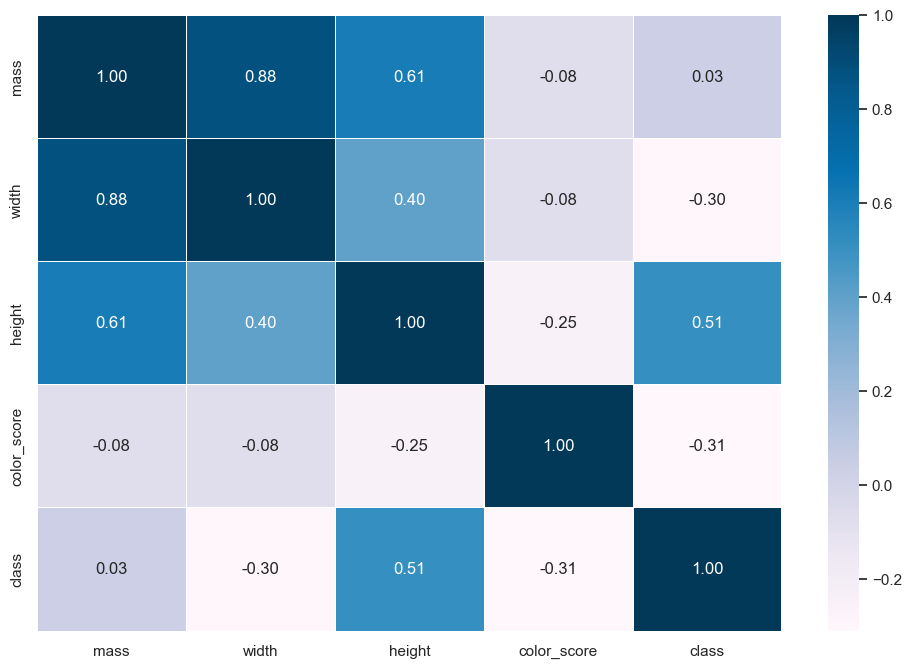

In [332]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), cmap="PuBu", annot=True, linewidths=0.5, fmt='.2f', ax=ax)
plt.show()

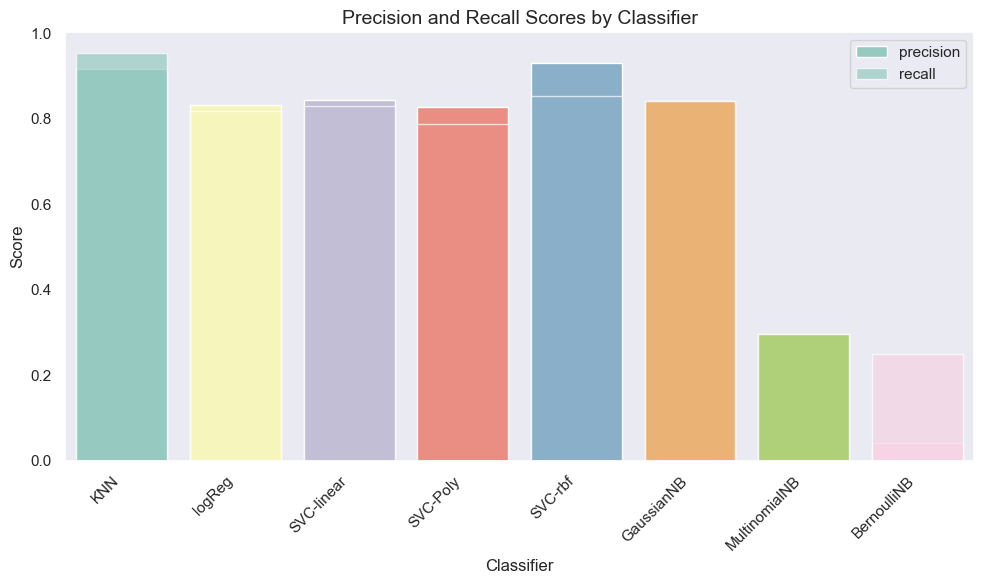

In [333]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the 'df_table' DataFrame with precision and recall values

# Set the style for Seaborn (optional)
sns.set(style="dark")

# Create a bar plot for precision and recall
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(data=df_table, x=df_table.index, y="precision", palette="Set3", label="precision")
sns.barplot(data=df_table, x=df_table.index, y="recall", palette="Set3", label="recall", alpha=0.7)

# Set the labels and title
plt.xlabel("Classifier", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Precision and Recall Scores by Classifier", fontsize=14)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()  # Ensures all labels are visible
plt.show()


### PICKLE

In [334]:
import pickle

with open('classifier_results.pkl', 'wb') as file:
    pickle.dump(df_table, file)